<a href="https://colab.research.google.com/github/AllaRudenkoGit/MyStudying/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [216]:
data=pd.read_csv('/content/sample_data/Titanic-Dataset.xls')

In [217]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [219]:
data.size

10692

In [220]:
data.drop(['Name','Ticket','PassengerId'],axis = 1, inplace = True)

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [222]:
data.size

8019

In [223]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [201]:
from sklearn.preprocessing import LabelEncoder
labelsToEncode=['Cabin','Embarked','Sex']
for label in labelsToEncode:
  le=LabelEncoder()
  data[label] = le.fit_transform(data[label])

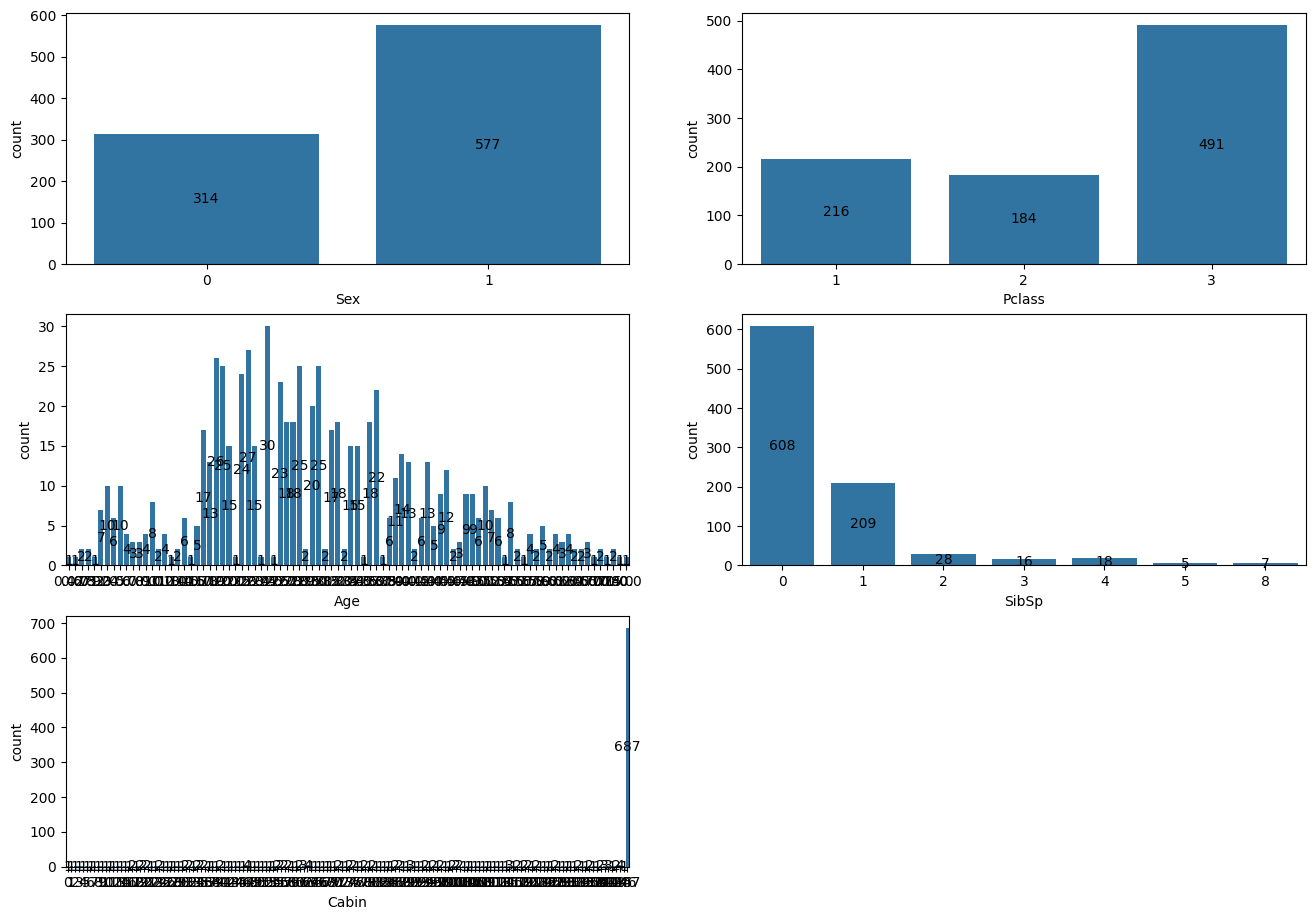

In [202]:
cols=["Sex","Pclass","Age","SibSp","Cabin"]

fig=plt.figure(figsize=(16,15))
for idx,col in enumerate(cols):
  ax=plt.subplot(4,2,idx+1)
  sns.countplot(x=data[col],ax=ax)
  for container in ax.containers:
    ax.bar_label(container,label_type="center")

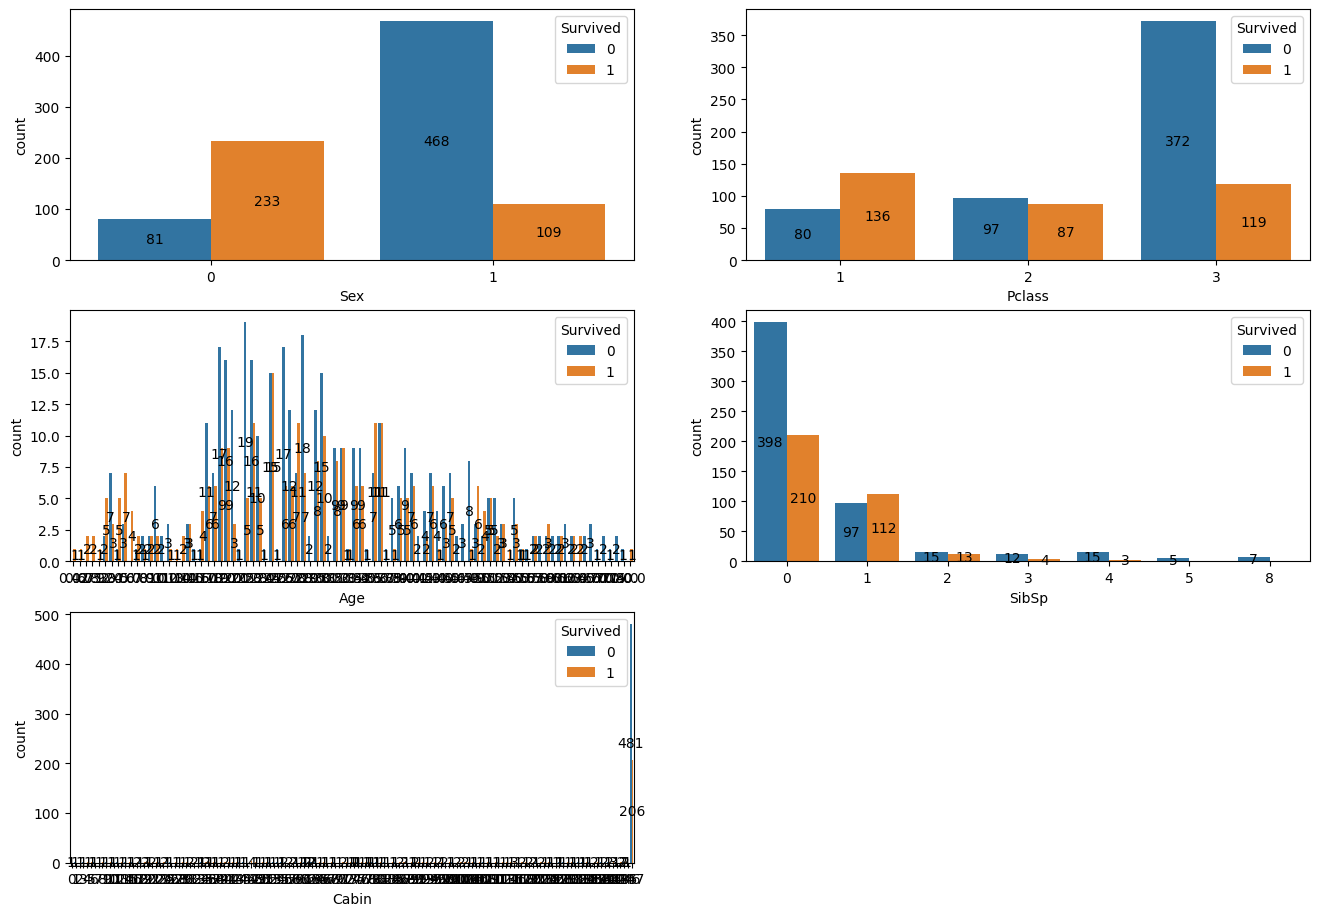

In [203]:
fig=plt.figure(figsize=(16,15))

for idx,col in enumerate(cols):
  ax=plt.subplot(4,2,idx+1)
  sns.countplot(x=data[col],ax=ax,hue=data['Survived'])
  for container in ax.containers:
    ax.bar_label(container,label_type="center")

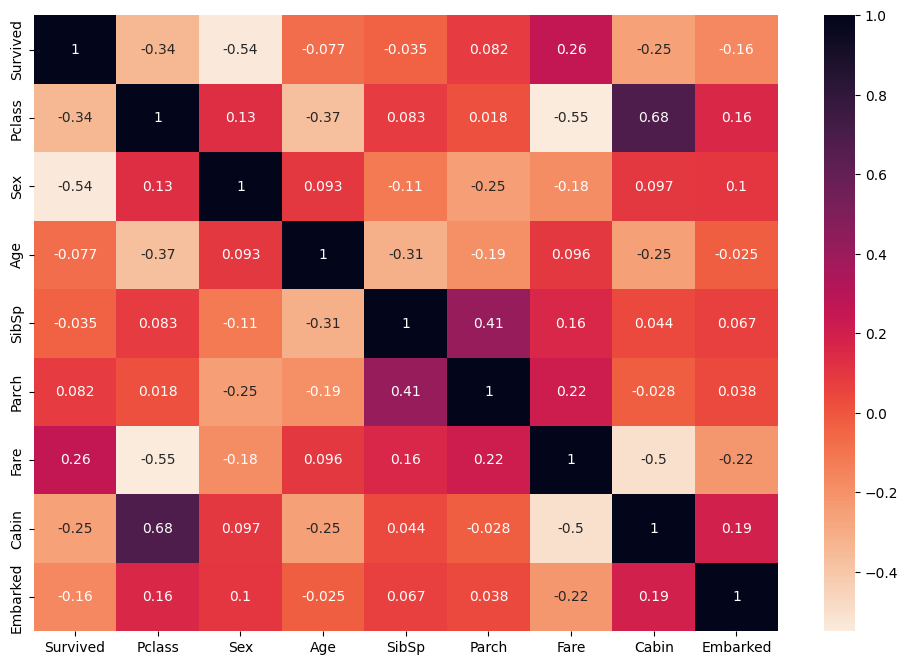

In [204]:
correlations=(data.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations,annot=True,cmap="rocket_r")
plt.show()

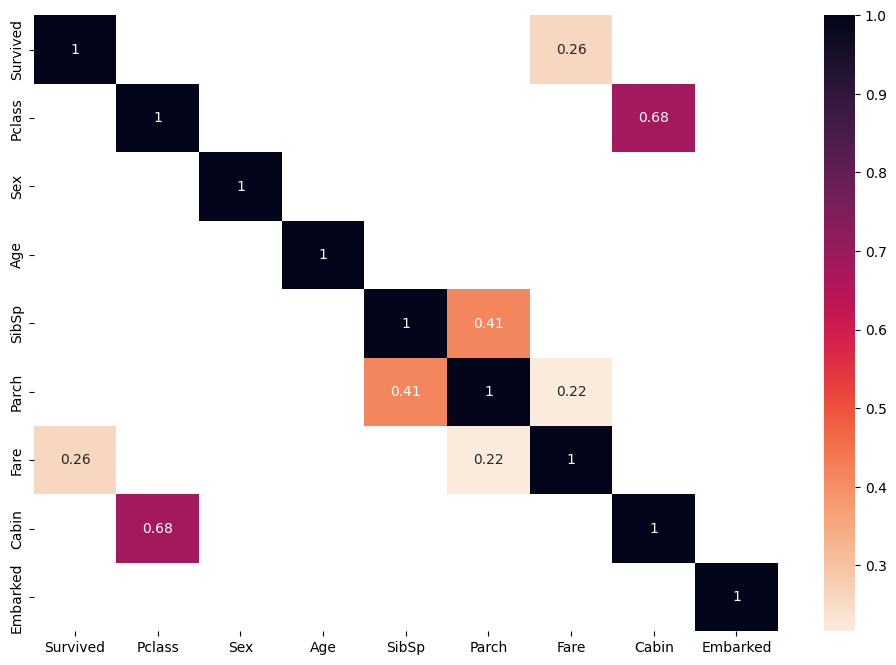

In [205]:
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations>0.2],annot=True,cmap="rocket_r")
plt.show()

In [206]:
px.imshow(data.corr(),title="Корреляционная матрица")

In [207]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,147,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,147,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,147,2
887,1,1,0,19.0,0,0,30.0000,30,2
888,0,3,0,NaN,1,2,23.4500,147,2
889,1,1,1,26.0,0,0,30.0000,60,0


In [208]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [209]:
from sklearn.model_selection import train_test_split
X = data.drop(['Survived'],axis=1)
Y = data['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=44)

In [210]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsClassifier

In [224]:
data.drop(['Age','Cabin','Embarked'],axis=1,inplace=True)

In [225]:
reg=LinearRegression()
reg.fit(X_train,Y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [228]:
regr=RandomForestRegressor (max_depth=10,random_state=2)
regr.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, random_state=2)

In [229]:
pred2 = regr.predict(X_test)

In [234]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
117,2,1,29.0,1,0,21.0000,147,2
143,3,1,19.0,0,0,6.7500,147,1
748,1,1,19.0,1,0,53.1000,100,2
796,1,0,49.0,0,0,25.9292,94,2
853,1,0,16.0,0,1,39.4000,99,2
...,...,...,...,...,...,...,...,...
82,3,0,NaN,0,0,7.7875,147,1
185,1,1,NaN,0,0,50.0000,9,2
157,3,1,30.0,0,0,8.0500,147,2
486,1,0,35.0,1,0,90.0000,87,2


In [236]:
pred2

array([2.27699489e-02, 2.62383410e-01, 6.31576190e-01, 9.70000000e-01,
       1.00000000e+00, 2.10537241e-01, 9.70000000e-01, 0.00000000e+00,
       6.99521188e-02, 7.84642857e-01, 1.53194252e-01, 1.33843906e-02,
       5.03149912e-01, 4.74857143e-01, 7.55820168e-01, 1.99210739e-01,
       1.42281191e-01, 8.29880900e-01, 9.90000000e-01, 1.20482432e-01,
       6.22034119e-02, 1.86170197e-01, 9.80000000e-01, 5.48333333e-01,
       3.82857143e-01, 1.96805001e-01, 5.90000000e-01, 9.20196516e-02,
       1.00000000e+00, 8.06071429e-01, 9.80000000e-01, 9.90000000e-01,
       9.90000000e-01, 1.25603032e-02, 3.65275743e-02, 1.00000000e+00,
       4.15275743e-02, 1.00000000e+00, 1.90945909e-02, 9.70000000e-01,
       4.70854301e-01, 4.38888889e-01, 1.00000000e-01, 5.50000000e-02,
       2.05318935e-02, 8.04742731e-02, 2.53500263e-01, 2.01995678e-02,
       7.06083333e-01, 2.39079347e-01, 8.47494399e-01, 1.40365377e-01,
       1.03589286e-01, 4.67264596e-01, 9.60000000e-01, 1.56935113e-01,
      

In [237]:
Y_test

,Survived
117,0
143,0
748,0
796,1
853,1
...,...
82,1
185,0
157,0
486,1


In [230]:
mean_squared_error(Y_test,pred2)

0.16742270157012532

In [231]:
mean_absolute_percentage_error(Y_test,pred2)

705056715861512.1

In [233]:
LassoReg = LassoCV(cv=5,random_state=0).fit(X_train,Y_train)

ValueError: Input X contains NaN.
LassoCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [241]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values